Saved quantized image to: D:\sem 6\DIP\L01 images\clustering_quant_K16.png
K=16  Rate≈4.00 bits/pixel  MSE=139.17  PSNR=26.70 dB


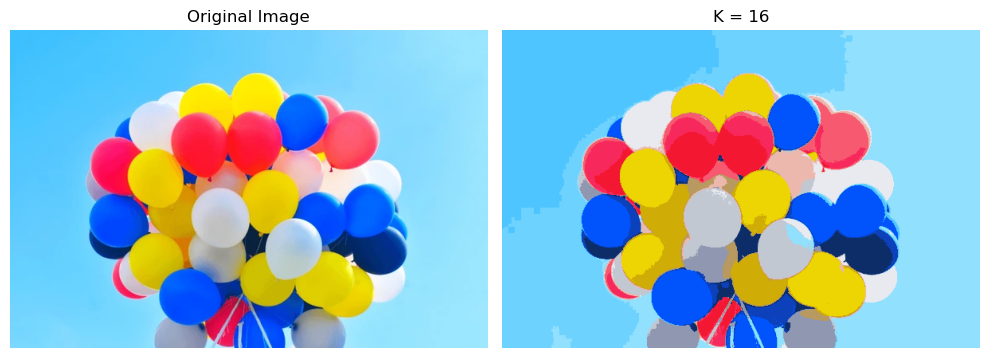

In [9]:
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import math

IMAGE_PATH = r"D:\sem 6\DIP\L01 images\group-colorful-balloons-against-clear-600nw-2659820893.webp"
OUTPUT_DIR = os.path.dirname(IMAGE_PATH)
K = 16

def compute_mse(orig, recon):
    diff = orig.astype(np.float32) - recon.astype(np.float32)
    return np.mean(diff**2)

def compute_psnr(mse, max_val=255.0):
    if mse == 0:
        return float('inf')
    return 10 * math.log10((max_val**2) / mse)

img = Image.open(IMAGE_PATH).convert("RGB")
img_arr = np.array(img)
H, W, C = img_arr.shape
pixels = img_arr.reshape(-1, 3).astype(np.float32)

kmeans = KMeans(n_clusters=K, n_init=10, random_state=0)
labels = kmeans.fit_predict(pixels)
centers = kmeans.cluster_centers_.astype(np.uint8)
quant_pixels = centers[labels]
quant_img = quant_pixels.reshape(H, W, 3).astype(np.uint8)

mse = compute_mse(img_arr, quant_img)
psnr = compute_psnr(mse)
rate = math.log2(K)

out_name = f"clustering_quant_K{K}.png"
out_path = os.path.join(OUTPUT_DIR, out_name)
Image.fromarray(quant_img).save(out_path)

print("Saved quantized image to:", out_path)
print(f"K={K}  Rate≈{rate:.2f} bits/pixel  MSE={mse:.2f}  PSNR={psnr:.2f} dB")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_arr)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(quant_img)
plt.title(f"K = {K}")
plt.axis("off")

plt.tight_layout()
plt.show()
